## 1. Titanic (Regression)

In [120]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission (1).csv
Saving test.csv to test (4).csv
Saving train.csv to train (4).csv


In [121]:
import numpy as np 
import pandas as pd
import os
train_data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df = pd.read_csv('gender_submission.csv')

In [122]:
train_data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [123]:
test.keys()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [124]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [126]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


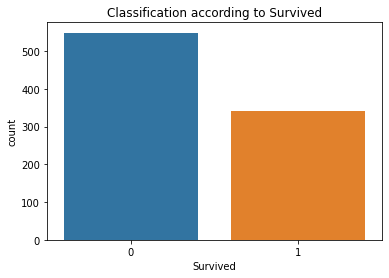

In [128]:
#survived 상태에 따른 분류
import matplotlib.pyplot as plt
import seaborn as sb

sb.countplot(train_data.Survived)
plt.title("Classification according to Survived")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


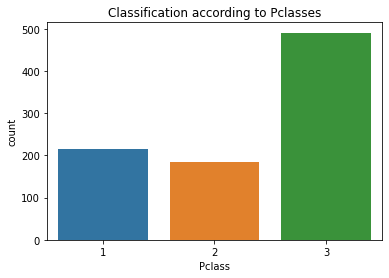

In [129]:
#P class에 따른 분류
sb.countplot(train_data.Pclass)
plt.title("Classification according to Pclasses")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


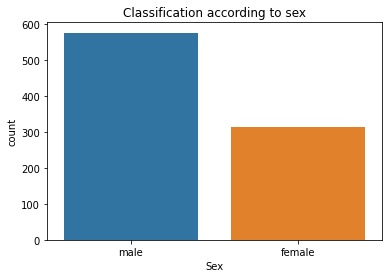

In [130]:
#성별에 따른 분류
sb.countplot(train_data.Sex)
plt.title("Classification according to sex")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


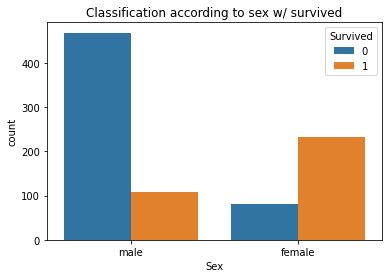

In [131]:
#survived 상태에 따른 성별 분류
sb.countplot(train_data.Sex, hue=train_data.Survived)
plt.title("Classification according to sex w/ survived")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


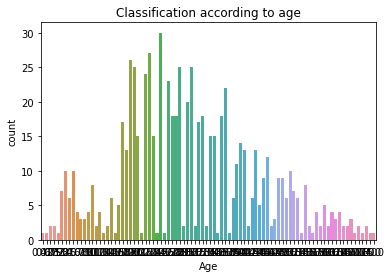

In [132]:
#나이에 따른 분류
sb.countplot(train_data.Age)
plt.title("Classification according to age")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


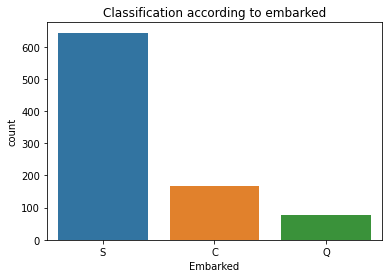

In [133]:
#embarked 상태에 따른 분류
sb.countplot(train_data.Embarked)
plt.title("Classification according to embarked")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


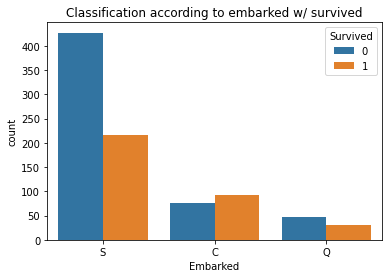

In [134]:
#survived 상태에 따른 embarked의 분류
sb.countplot(train_data.Embarked, hue=train_data.Survived)
plt.title("Classification according to embarked w/ survived")
plt.show()

In [135]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.Survived = output.Survived.astype("int")
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1


In [136]:
import random

def titanic_model(test):
    data_size = len(test)
    return [random.randint(0, 1) for i in range(0, data_size)]
  
def submit_predictions(test, predictions):
    output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
    output.to_csv('submission.csv', index=False)
    print('Saved file!')

predictions = titanic_model(test)
submit_predictions(test, predictions)

Saved file!


# 2. Image classification with CNN

In [137]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [138]:
#CIFAR10 data 불러오기
batch_size = 4 #배치 사이즈를 4로 설정

trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True, 
    transform=torchvision.transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=batch_size,
    shuffle=True
)

testset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=False,
    download=True, 
    transform=torchvision.transforms.ToTensor()
)
test_loader = torch.utils.data.DataLoader(
    testset, 
    batch_size=batch_size,
    shuffle=False
)

classes = trainset.classes
classes

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

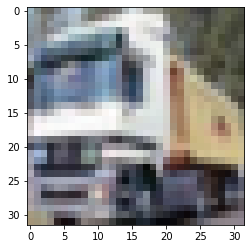

In [139]:
#이미지의 생김새와 데이터 다운로드 현황 확인 
import matplotlib
import matplotlib.pyplot as plt

images=train_loader.dataset[1][0]
plt.imshow(images.permute(1, 2, 0))

In [140]:
images.size() #이미지 형태 확인 [3, 32, 32]: 32*32 사이즈의 컬러 이미지인 것을 확인 

torch.Size([3, 32, 32])

In [141]:
cifar10 = datasets.cifar10 #cifar10 dataset을 정의
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] #총 10개의 클래스를 class_names으로 정의
 
print("Train samples:", train_images.shape, train_labels.shape) #train data의 형태를 확인
print("Test samples:", test_images.shape, test_labels.shape) #test data의 형태를 확인

train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

170508288/170498071 [==============================] - 5s 0us/step
Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


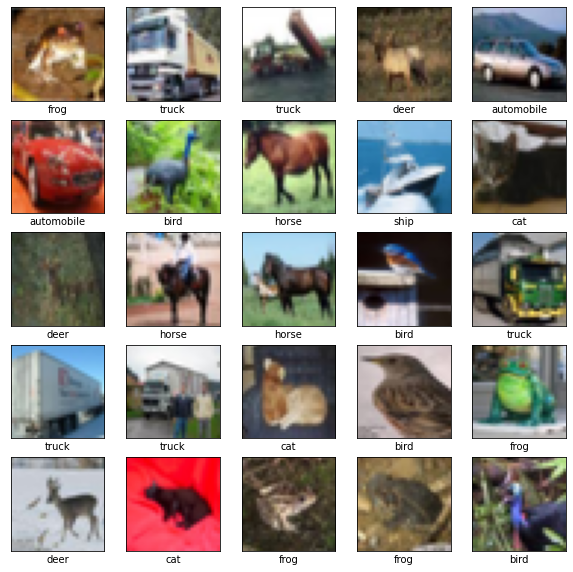

In [142]:
#train_image가 어떻게 생겼는지에 대해 확인
plt.figure(figsize=(10, 10)) #figure size를 10*10으로 설정
for i in range(25): #25개 이미지를 보이도록 설정
    plt.subplot(5, 5, i+1)
    plt.grid(False) #grid를 표시하지 않음
    plt.xticks([]) #x축 눈금 표시하지 않음
    plt.yticks([]) #y축 눈금 표시하지 않음
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]]) #xlabel에 class name을 표시하도록 설정
plt.show()

In [143]:
#이미지들을 0~1값을 갖도록 정규화 (255.0으로 나눠줌)
train_images = train_images/255.0
test_images = test_images/255.0

In [144]:
#CNN모델 구조 결정 (3개의 컨볼루션 층, 2개의 풀링 층, 10개의 클래스 분류이므로 FC층은 10개의 노드)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) #컨볼루션1
model.add(layers.MaxPooling2D((2, 2))) #풀링1
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #컨볼루션2
model.add(layers.MaxPooling2D((2, 2))) #풀링2
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #컨볼루션3
model.add(layers.Flatten()) #플래튼층
model.add(layers.Dense(64, activation='relu')) #FC층
model.add(layers.Dense(10, activation='softmax')) #활성화함수로  softmax 사용

In [145]:
#모델 학습
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
model.fit(train_images, train_labels, epochs=30) #epoch=30으로 학습

Epoch 1/30
1563/1563 [==============================] - 65s 41ms/step - loss: 1.4781 - accuracy: 0.4616
Epoch 2/30
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1211 - accuracy: 0.6040
Epoch 3/30
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9761 - accuracy: 0.6557
Epoch 4/30
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8798 - accuracy: 0.6919
Epoch 5/30
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8015 - accuracy: 0.7184
Epoch 6/30
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7426 - accuracy: 0.7392
Epoch 7/30
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6880 - accuracy: 0.7592
Epoch 8/30
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6418 - accuracy: 0.7739
Epoch 9/30
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6043 - accuracy: 0.7863
Epoch 10/30
1563/1563 [==============================] - 63s 40m

In [146]:
predictions = model.predict(test_images) #test images로 예측

In [147]:
#예측 결과를 그래프로 보여주기 위한 단계-data 이미지
def plot_image(i, predictions_array, true_label, img): #plot_image 정의
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False) #grid를 표시하지 않음
  plt.xticks([]) #x축 눈금 표시하지 않음
  plt.yticks([]) #y축 눈금 표시하지 않음
 
  plt.imshow(img, cmap=plt.cm.binary) #컬러맵을 회색조로 표시
 
  predicted_label = np.argmax(predictions_array) #예측 결과가 실제 값과 같을 때는 글씨를 파란색, 다를 때는 빨간색으로 표시하도록 설정
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
 
 #testimage를 표시하고 그 아래에 라벨과 정확도를 표시하도록 설정(class name이 true일 경우 blue, 다를 경우 red)
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)

In [148]:
#예측 결과를 그래프로 보여주기 위한 단계-예측값 그래프
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False) #grid를 표시하지 않음
  plt.xticks([]) #x축 눈금 표시하지 않음
  plt.yticks([]) #y축 눈금 표시하지 않음
  thisplot = plt.bar(range(10), predictions_array, color="#777777") #다른 예측 bar를 회색으로 표시하도록 설정
  plt.ylim([0, 1]) #y축 범위를 0에서 1까지로 설정
  predicted_label = np.argmax(predictions_array)

#예측 결과가 실제 값과 같을 때는 막대를 파란색, 다를 때는 빨간색으로 표시하도록 설정 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')

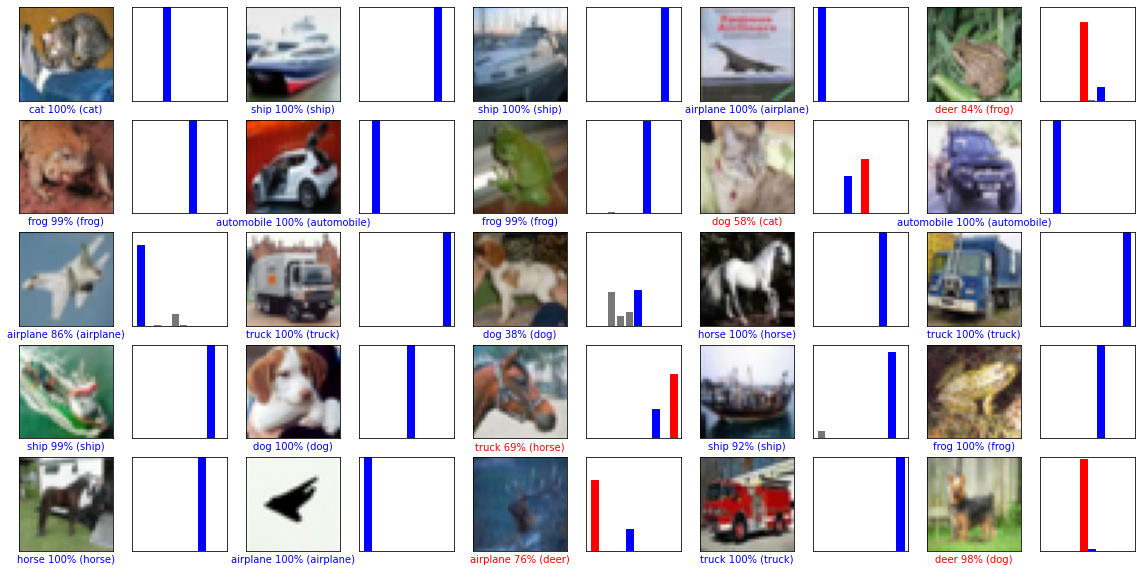

In [149]:
#테스트셋의 25개 이미지에 대한 예측 결과 확인
num_rows = 5 #행 5개 지정
num_cols = 5 #열 5개 지정
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows)) #나타낼 figure 사이즈 설정
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions,  test_labels) #테스트이미지값과 예측값, label을 표시
plt.show()

이번 기말 프로젝트를 통해서는 수업 시간에 배웠던 CNN 네트워크 모델에 대한 개념을 확립할 수 있었다. 이번에는 MNIST 데이터가 아닌 CIFAR10 데이터로 분류 작업을 진행하게 되었는데, MNIST 데이터의 경우 28x28의 흑백 데이터인 반면 CIFAR10 데이터의 경우 32x32의 컬러 데이터였다. 데이터를 불러온 후 초반 25개 이미지가 어떻게 생겼는지 확인을 하였고, 이후 이미지를 255.0으로 나누어 0~1값을 갖도록 정규화하였다. 다음으로 CNN 모델의 구조를 짜보았는데, 클래스가 총 10개이므로 FC(Fully-connected)층이 10개의 노드를 갖도록 하였고, 컨볼루션 층은 총 3개, 풀링 층은 총 2개가 되도록 하였다. 따라서 간략하게 표현하면 컨볼루션-풀링-컨볼루션-풀링-컨볼루션-플래튼-FC의 형태를 가진 모델인 것이다. 또한 활성화 함수로 softmax를 사용하여 값들의 총합은 항상 1이 되게 하였다. 이 다음 epoch=10 상태로 학습시켜보았을 때 정확도가 71%로 비교적 낮게 나왔고, 이후 정확도를 높이는 방법을 구글링하고 교수님의 강의노트를 보았을 때 epoch가 너무 낮아 정확도가 높게 나오기 어렵다는 결론을 얻을 수 있었고, epoch를 올려야겠다는 생각을 하게 되었다. 이후 노트북의 cpu가 견딜 수 있는 선에서 epoch=30 상태로 학습을 진행하였을 때에는 정확도가 94%로 훨씬 높아진 것을 확인할 수 있었다. 최종적으로 결과를 확인하기 위해서는 test image와 accuracy를 한 눈에 볼 수 있어야 했는데, 이때 plot_image와 plot_value_array를 정의하였고, 실제 클래스와 예측값이 같을 때는 파란색, 다를 때는 빨간색으로 표시되게 하여 한 눈에 예측의 참과 거짓을 확인할 수 있게 하였다. 모델을 학습하였을 때, train image는 epoch를 반복할수록 loss는 줄어들고 accuracy는 증가하는 것을 확인할 수 있었다. 최종적으로 학습을 30번 반복하였을 때는 loss는 0.1777, accuracy는 0.9366의 값을 가지는 것을 확인할 수 있었다. 그 다음 test set의 25개 이미지에 대한 예측 결과를 확인해보면 25개 이미지 중 5개 이미지의 예측이 틀렸다는 것을 확인할 수 있었고, test set으로만 보았을 때는 80% 정도의 정확도를 보인다는 것을 알 수 있었다. 
정확도를 더욱 더 올리기 위해서는 학습량을 올려주는 것이 중요하다고 판단되는데, CPU를 통해서는 학습량을 더 올리기가 힘들기 때문에 GPU를 통해서 학습량을 늘려주어야 한다고 생각한다. 또한 모델의 구조를 변형시켜서도 학습량을 올려줄 수 있을 것 같다고 생각이 되었는데, 이후 구글링을 통해 CIFAR10 데이터 분류를 어떤 방식으로 하였는지 더 알아보아야 할 것 같다는 생각이 들었다. 평소 수업을 들으며 이론적인 설명을 들은 후 컴퓨터로 이를 구현하는 것을 많이 어려워하였는데, 이번 프로젝트를 통해 CNN과 관련하여 클래스, 모델에 대한 이해도가 더 높아졌다는 생각을 하게 되었다. 또한 다른 데이터들을 통해 이러한 분류작업을 진행해보고 싶다는 생각을 하게 되었고, CIFAR100이라는 클래스가 100개인 데이터 셋이 있다는 것을 알게 되어 이또한 이번 겨울 방학 때 도전해보아야겠다는 생각을 하게 되었다. 
